In [1]:
# This code splits the given dataset to test-train files.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scienceplots
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
#sns.set_theme()
#sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
#plt.style.use(['science','no-latex'])
print('Pandas v', pd.__version__)

Pandas v 1.3.5


# Configurations

In [2]:
# Configurations 
#latex_dir = Path(r"C:\Users\3057550\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
#latex_dir = Path(r"C:\Users\kasim\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
latex_dir = Path(r'C:\Users\kasim\Documents\GitHub\hybrid_nlp_journal')
SAVE_OUTPUTS = False

In [3]:
# Notes about result files:
# 'results_230214_205321.pkl' # classical ML - Dataset: Train Kaggle, Test Kaggle
# 'results_230214_210527.pkl' # classical ML - Dataset: Train Harika, Test Harika
# 'results_230214_211201.pkl' # classical ML- Dataset: Train: Harika.train, Test: Kaggle.test

# 'results_230214_205100.pkl' # bert - Dataset: Train Kaggle, Test Kaggle
# 'results_230309_112627.pkl' # bert- Dataset: Train Harika, Test Harika
# 'results_230214_193603.pkl' # bert- Dataset: Train: Harika.train, Test: Kaggle.test
main_folder = Path('../')


#results_file = main_folder / 'results_230214_205321.pkl' # classical ML
#results_file_bert = main_folder / 'results_230214_205100.pkl' # bert
results_file = main_folder / 'results_230214_210527.pkl' # classical ML HARIKA
results_file_bert = main_folder / 'results_230309_112627.pkl' # bert HARIKA
print(results_file.is_file())
print(results_file_bert.is_file())

True
True


In [4]:
methods={}

methods['classic_ml'] = ['bow_nb', 'bow_xgboost', 'bow_svm', 'boc_nb', 'boc_xgboost', 'boc_svm',
       'tfidf_nb', 'tfidf_xgboost', 'tfidf_svm', 'tfidfng_nb',
       'tfidfng_xgboost', 'tfidfng_svm']
methods['hybrid'] = ['hybrid1_nb', 'hybrid1_xgboost',
       'hybrid1_svm', 'hybrid1_all_ml_averaged', 'hybrid2_boc',
       'hybrid2_tfidf', 'hybrid2_tfidf_ng', 'hybrid3', 'hybrid4_nb',
       'hybrid4_xgboost', 'hybrid4_svm']
methods['transformer'] = ['bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small']
method_categories = [method_cat for method_cat in methods]

# Load and Setup Data

In [5]:
# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "overall_accuracy": "Accuracy", 
        "precision": "Precision",
        "recall":"Recall",
        "f1":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train size":"Train Size",
        "test size":"Test Size",
        "train data":"Train Data",
        "test data":"Test Data",
        "training time":"Training Time (ms)",
        "testing time":"Inference Time (ms)",
        "log(f1/s)":"F1 Efficiency"
        }
    index_mapper = {
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost", 
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB', 
        'boc_xgboost':'BoC XGBoost', 
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB', 
        'tfidf_xgboost': 'TF-IDF XGBoost', 
        'tfidf_svm': 'TF-IDF SVM', 
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost', 
        'tfidfng_svm': 'TF-IDF ngram SVM', 
        'hybrid1_nb': 'Hybrid-1 NB', 
        'hybrid1_xgboost': 'Hybrid-1 XGBoost',
        'hybrid1_svm': 'Hybrid-1 SVM', 
        'hybrid1_all_ml_averaged': 'Hybrid-1 All', 
        'hybrid2_boc': 'Hybrid-2 BoC',
        'hybrid2_tfidf': 'Hybrid-2 TF-IDF', 
        'hybrid2_tfidf_ng': 'Hybrid-2 TF-IDF ngram', 
        'hybrid3': 'Hybrid-3', 
        'hybrid4_nb': 'Hybrid-4 NB',
        'hybrid4_xgboost': 'Hybrid-4 XGBoost', 
        'hybrid4_svm': 'Hybrid-4 SVM', 
        'bert_en_uncased_L-12_H-768_A-12' : 'BERT UL12H768A12',
        'bert_en_cased_L-12_H-768_A-12' : 'BERT CL12H768A12',
        'small_bert/bert_en_uncased_L-2_H-128_A-2' : 'BERT small UL2H128A2',
        'small_bert/bert_en_uncased_L-4_H-512_A-8' : 'BERT small UL4H512A8',
        'small_bert/bert_en_uncased_L-8_H-128_A-2' : 'BERT small UL8H128A2',
        'small_bert/bert_en_uncased_L-12_H-768_A-12' : 'BERT small UL12H768A12',
        'bert_multi_cased_L-12_H-768_A-12' : 'BERT MCL12H768A12', 
        'albert_en_base' : 'ALBERT', 
        'electra_base' : 'ELECTRA',
        'electra_small': 'ELECTRA small'
    }
    
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled.index.rename("Method",inplace=True)
    return df_new_labeled

## Function definitions

In [6]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_bar(df_small, ax, metric='f1', width=0.9, offset=0):
    
    
    col_names = df_small.columns
    row_names = df_small.index
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]

    bar_vals = df_small.loc[:][metric].values.tolist()
    bar_tics = df_small.loc[:][metric].index.tolist()
    bar_width = width

    bar_container = ax.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax.bar_label(bar_container, fmt='%0.4f', padding=0.8, rotation=90)
    
    #ax.tick_params(axis='x', rotation=70, ha="right")
    plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', right=False)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    #ax.set(ylim=(0.8, 1))




In [7]:
#fig, ax = plt.subplots(figsize=(5, 5))
def my_plot_twin_bar(df_small, ax, metric=['F1','Inference Time (ms)']):
    width = 0.3
    offset = 0.3
    my_plot_bar(df_small, ax, metric[0],width=width,offset=0)

    ax2 = ax.twinx()
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines.top.set_visible(False)
    # col_names = df_small.columns
    # row_names = df_small.index
    
    colors = df_small.loc[:,'color'].values
    colors = [list(colors[i][0]) for i in range(len(colors))]
    new_colors = np.asarray(colors)/[3.2, 3.2, 3.2, 1]
    new_colors = new_colors.sum(axis=1)-1
    new_colors = np.expand_dims(new_colors, axis=0)
    new_colors = np.tile(new_colors.transpose(),(1,4))
    new_colors[:,3] =1
    colors = new_colors.tolist()
    

    bar_vals = df_small.loc[:][metric[1]].values.tolist()
    bar_tics = df_small.loc[:][metric[1]].index.tolist()
    bar_width = width

    bar_container = ax2.bar(x=np.arange(len(bar_tics))+offset, height=bar_vals, 
                           width=bar_width,color=colors, tick_label=bar_tics)
    ax2.bar_label(bar_container, fmt='%0.4fms', padding=0.8, rotation=90)
    
    # #ax.tick_params(axis='x', rotation=70, ha="right")
    # plt.setp(ax.get_xticklabels(), rotation=70, ha="right", rotation_mode="default")
    # plt.setp(ax.get_xticklabels(),  va="center", rotation_mode="anchor")
    # ax.tick_params(axis='x', which='both', bottom=False, top=False)
    # ax.tick_params(axis='y', which='both', right=False)
    # # Hide the right and top spines
    # ax.spines.right.set_visible(False)
    # ax.spines.top.set_visible(False)

    return ax, ax2

    #ax.set(ylim=(0.8, 1))




## Read and preprocess dataset

In [8]:
#%%script echo skip
df = pd.read_pickle(results_file)
df2 = pd.read_pickle(results_file_bert)
df_all = pd.concat([df, df2])
#df_all
#df_all.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small","f1"]+1
#df_acc = (df_all.tn + df_all.tp).div(df_all.tn + df_all.tp + df_all.fn + df_all.fp)*100 #fill the missing accuracies that I forgot to record

#df_all.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small","overall_accuracy"] = df_acc.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small"]
#df_acc.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small"]

#df = df_all
#df

In [9]:
df = df_all.copy()

In [10]:
# Fix Nan value of hybrid1_all_ml_averaged

#df.loc["hybrid1_all_ml_averaged"]["training time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["training time"]
#df.loc["hybrid1_all_ml_averaged"]["testing time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["testing time"]
df.at["hybrid1_all_ml_averaged", "training time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["training time"]
df.at["hybrid1_all_ml_averaged", "testing time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["testing time"]
#df

In [11]:
# Normalize time (per sample/ms )
df.loc[:,"training time"] = df.loc[:,"training time"]*1000 / df.loc[:,"train size"]
df.loc[:,"testing time"] = df.loc[:,"testing time"]*1000 / df.loc[:,"test size"]

In [12]:
for method in methods:
    df.loc[methods[method], 'category'] = method

In [13]:
# set the colormap for each category (classical ml, hybrid, transformer)
metric='f1'
method_categories = [i for i in methods.keys()]
method_cat_cm_func = [plt.cm.BuPu, plt.cm.YlGn, plt.cm.OrRd]
df.loc[:, 'color'] = -1.0
for k, cat in enumerate(method_categories):
    cat_cm_func = method_cat_cm_func[k]
    df_small = df[df['category']==cat] # OR df.loc[methods[cat]]
    
    df_small = df_small.sort_values(metric,ascending=False)
    col_names = df_small.columns
    row_names = df_small.index

    colors = cat_cm_func(np.linspace(0.1, 0.6, len(row_names)))
    colors = colors[::-1]
    df_small.loc[:, 'color'] = [ 0 for i in range(len(row_names))]
    for i, row_name in enumerate(row_names):
        df_small.loc[row_name,'color'] = [[np.asarray(colors[i],dtype=float)]]
        #print(row_name, df_small.loc[row_name,'color'])
    df.update(df_small)

In [14]:
df

,overall_accuracy,precision,recall,f1,tn,fp,fn,tp,train size,test size,train data,test data,training time,testing time,category,color
bow_nb,96.768337,0.996877,0.937592,0.966326,1388.0,4.0,85.0,1277.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.000905,0.000362,classic_ml,"[[0.812964244521338, 0.8758938869665513, 0.929..."
bow_xgboost,94.553377,0.987923,0.900881,0.942396,1377.0,15.0,135.0,1227.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.181152,0.006156,classic_ml,"[[0.8978854286812764, 0.9390234525182622, 0.96..."
bow_svm,95.388526,0.916948,0.997063,0.955329,1269.0,123.0,4.0,1358.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.110078,0.078370,classic_ml,"[[0.8576239907727797, 0.9097270280661285, 0.94..."
boc_nb,98.838054,0.999249,0.977239,0.988122,1391.0,1.0,31.0,1331.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.000905,0.001449,classic_ml,"[[0.6708650519031142, 0.7729796232218378, 0.87..."
boc_xgboost,99.745824,0.997065,0.997797,0.997431,1388.0,4.0,3.0,1359.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.343926,0.006186,classic_ml,"[[0.5490196078431373, 0.5750096116878124, 0.77..."
boc_svm,99.600581,0.994872,0.997063,0.995966,1385.0,7.0,4.0,1358.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.102372,0.086523,classic_ml,"[[0.5700576701268744, 0.6326489811610919, 0.79..."
tfidf_nb,97.966594,0.999235,0.959618,0.979026,1391.0,1.0,55.0,1307.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.000362,0.000362,classic_ml,"[[0.764244521337947, 0.8389850057670126, 0.908..."
tfidf_xgboost,98.075527,0.967166,0.994860,0.980818,1346.0,46.0,7.0,1355.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.124589,0.003621,classic_ml,"[[0.7155247981545559, 0.8041061130334486, 0.88..."
tfidf_svm,99.564270,0.994868,0.996329,0.995598,1385.0,7.0,5.0,1357.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.074218,0.065270,classic_ml,"[[0.5944175317185698, 0.6840753556324491, 0.82..."
tfidfng_nb,99.201162,0.999255,0.984581,0.991864,1391.0,1.0,21.0,1341.0,5508.0,2754.0,NEW_normal_plus_waf_bypass_dataset_training.tsv,NEW_normal_plus_waf_bypass_dataset_testing.tsv,0.001267,0.000725,classic_ml,"[[0.6221453287197232, 0.7390234525182623, 0.85..."


# Latex

## Latex Figures and Tables

In [15]:
# Figure configs
plt.rcParams.update({'figure.dpi': '300'})
plt.rcParams['font.family'] = "Times New Roman"

In [16]:
import pathlib
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"
assert (table_folder.is_dir()), "No such folder"
assert (figure_folder.is_dir()), "No such folder"



### All Sorted (F1 and inference time)

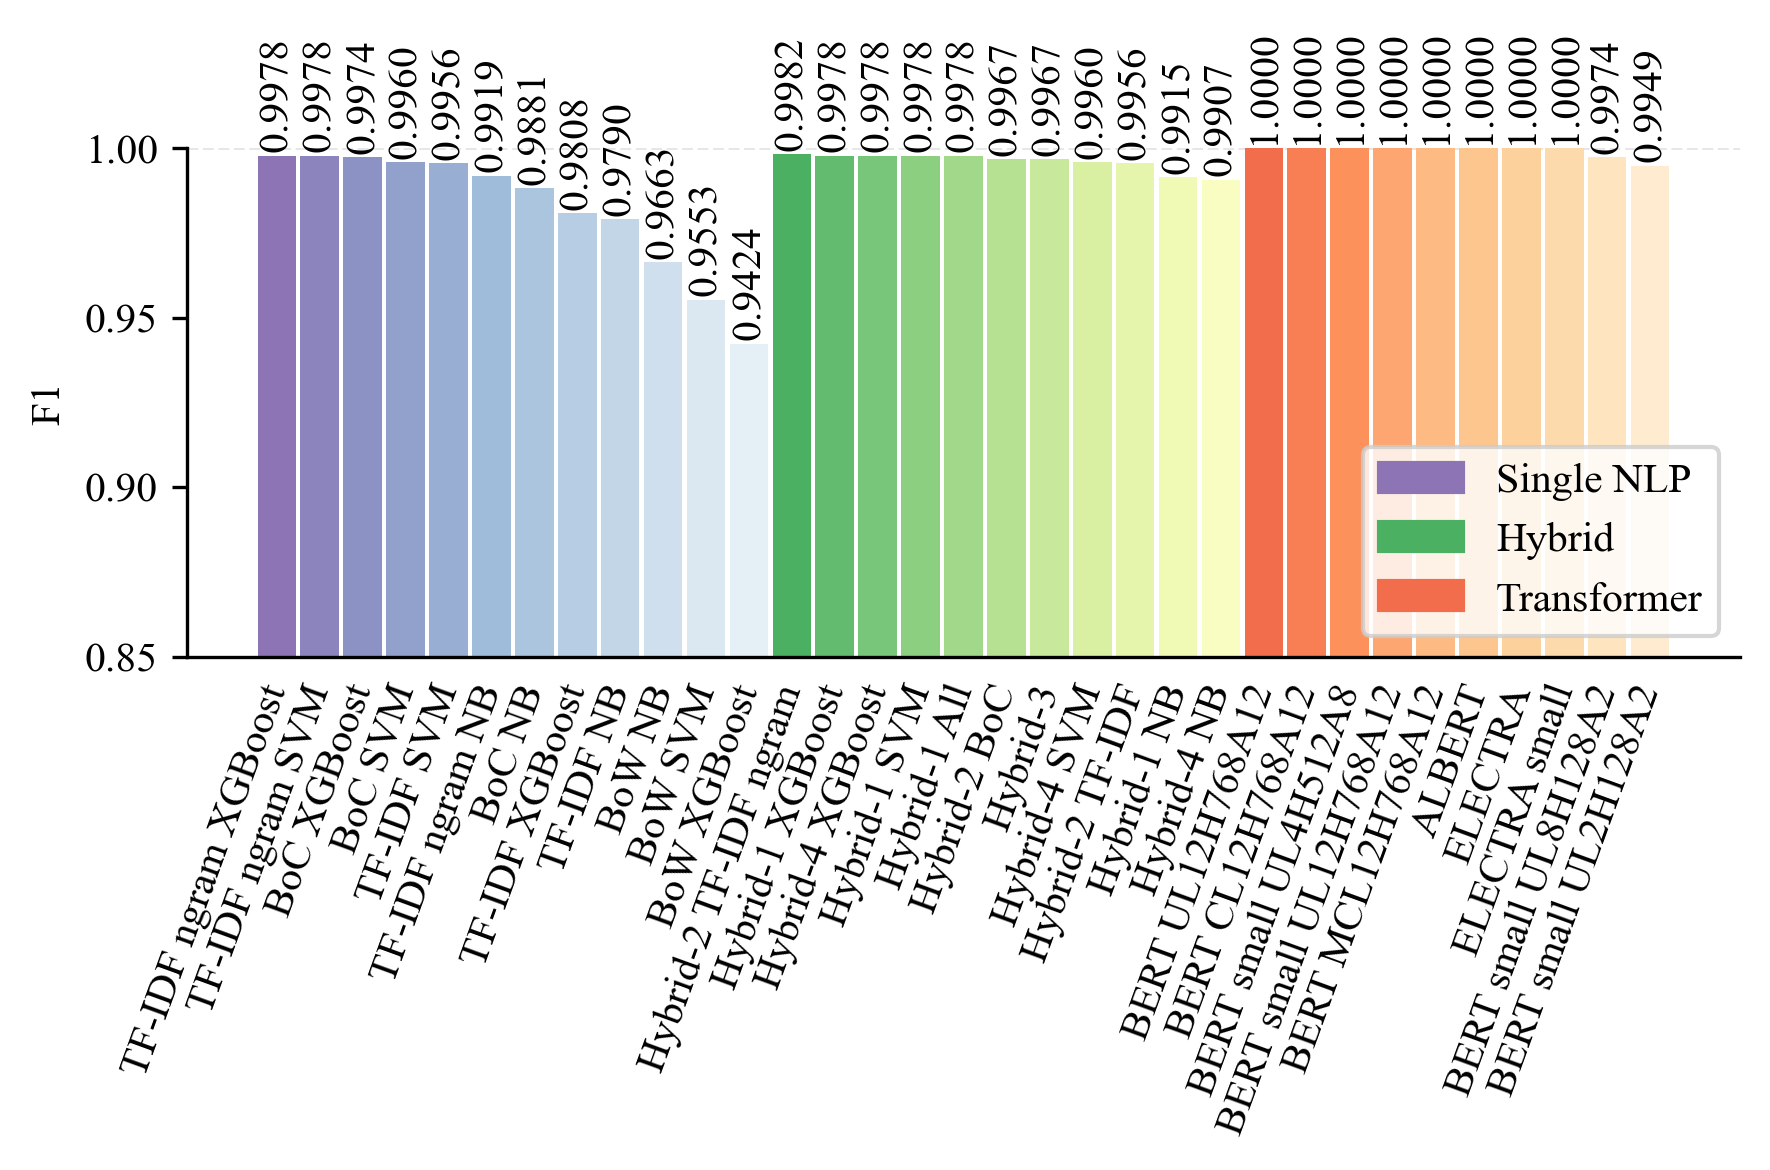

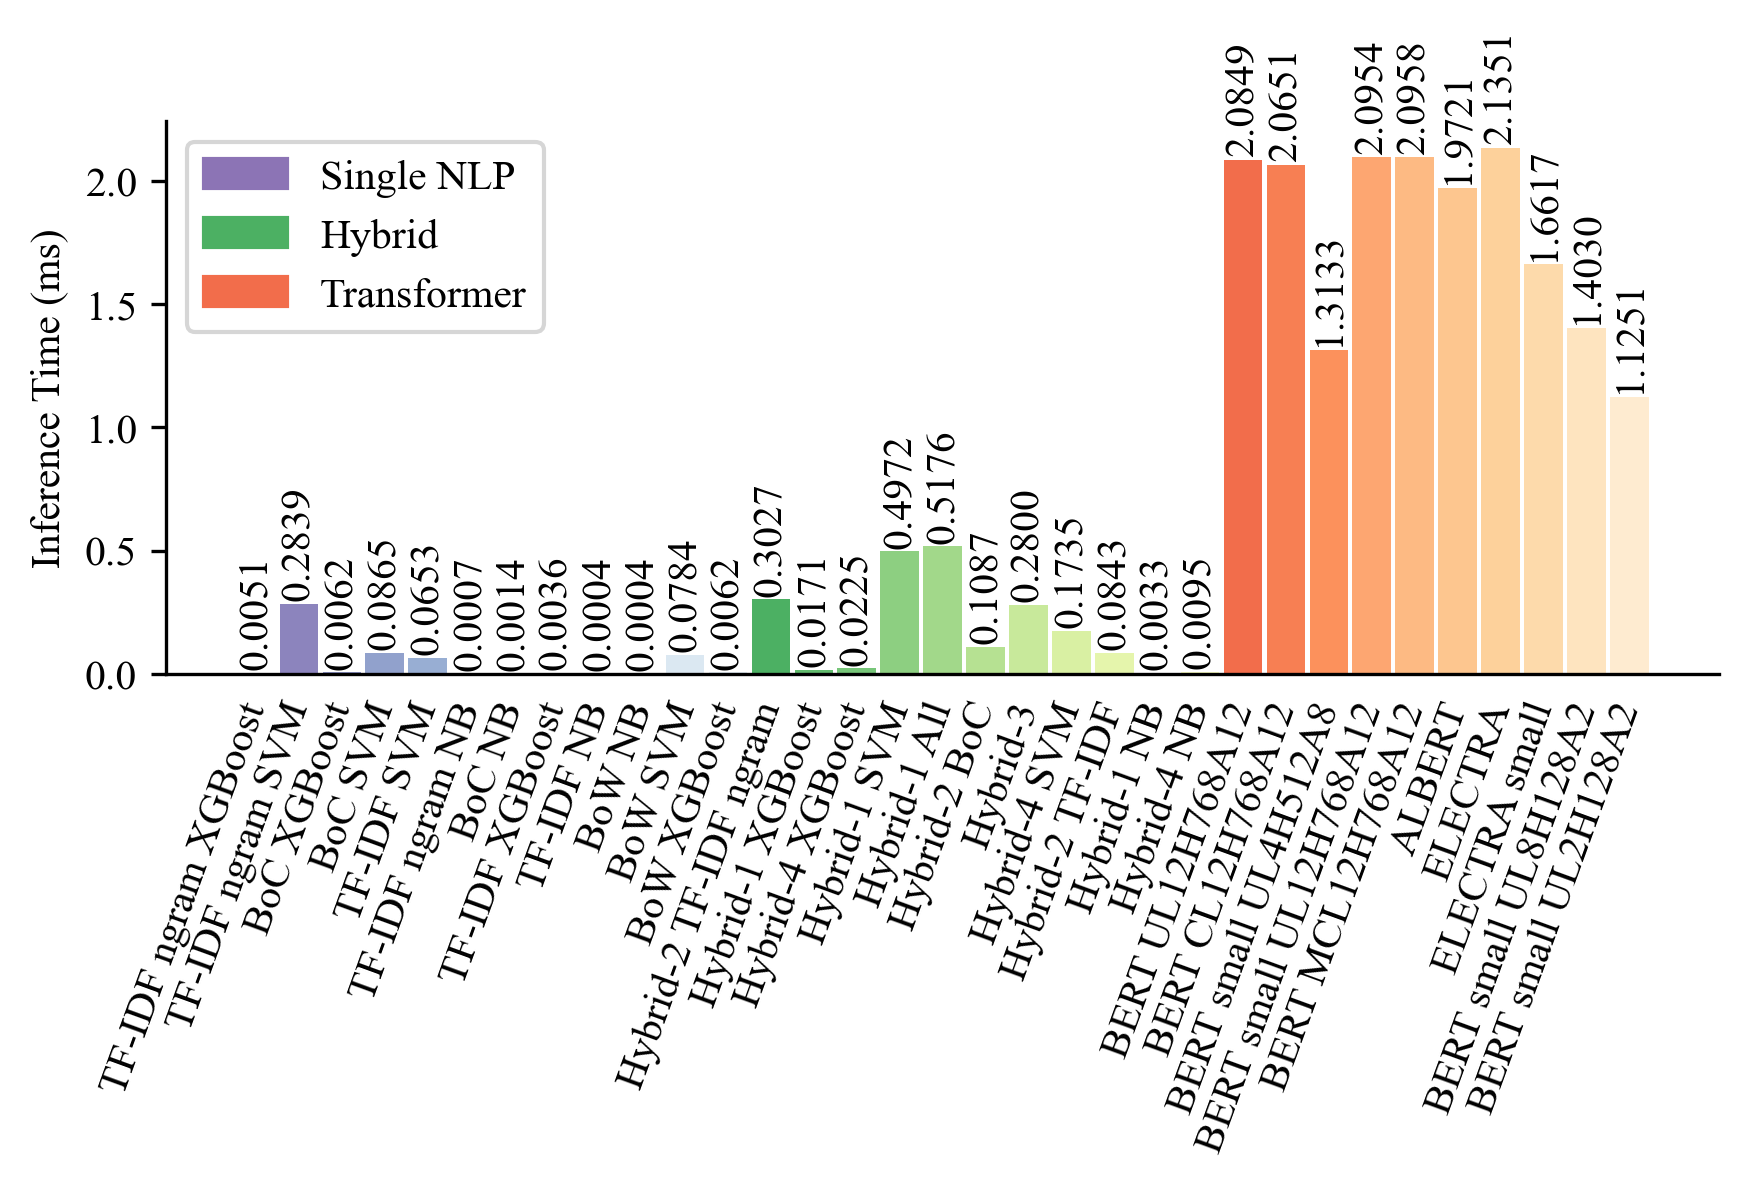

In [17]:
# method_category = 'transformer'
# metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
#        'testing time', 'color']
import matplotlib.patches as mpatches
df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = rename_table_labels(df_small)
#df_small = df.loc[methods[method_category], metrics]
#df_small = df_small.sort_values(['category','f1'],ascending=[True, False])

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_2 = np.asarray(df_small[df_small['category']=='hybrid'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_3 = np.asarray(df_small[df_small['category']=='transformer'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')
legend_cat_2 = mpatches.Patch(color=color_cat_2, label='Hybrid')
legend_cat_3 = mpatches.Patch(color=color_cat_3, label='Transformer')

# Figure
current_figure_name = 'all_f1_sorted_f1.png'
fig, ax = plt.subplots(figsize=(6, 4))
my_plot_bar(df_small,ax,'F1')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.85, 1))
ax.set_ylabel('F1')
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)
###############################
current_figure_name = 'all_f1_sorted_inference_time.png'
fig, ax = plt.subplots(figsize=(6, 4))
my_plot_bar(df_small,ax,'Inference Time (ms)')
ax.set_ylabel('Inference Time (ms)')
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='upper left')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

In [18]:
def process_style_to_my_latex_format(df_latex):
    # returns style object
    s = df_latex.reset_index().style.hide_index()
    s = s.format(precision=4, escape="latex")
    return s

### Single NLP (F1 vs Inference)

In [19]:
# Table: Single NLP
table_name = "single"
caption="Accuracy and inference speed of single NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'classic_ml'
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time', 'color', 'category']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

if SAVE_OUTPUTS:
    s.to_latex(buf=out_file_name,
       column_format="lrrrrrr", position="htbp", position_float="centering",
       hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of single NLP methods.}
\label{table:single}
\begin{tabular}{lrrrrrr}
\toprule
{Method} & {Accuracy} & {Precision} & {Recall} & {F1} & {Training Time (ms)} & {Inference Time (ms)} \\
\midrule
BoW NB & 96.7683 & 0.9969 & 0.9376 & 0.9663 & 0.0009 & \textbf{0.0004} \\
BoW XGBoost & 94.5534 & 0.9879 & 0.9009 & 0.9424 & 0.1812 & 0.0062 \\
BoW SVM & 95.3885 & 0.9169 & 0.9971 & 0.9553 & 0.1101 & 0.0784 \\
BoC NB & 98.8381 & 0.9992 & 0.9772 & 0.9881 & 0.0009 & 0.0014 \\
BoC XGBoost & 99.7458 & 0.9971 & 0.9978 & 0.9974 & 0.3439 & 0.0062 \\
BoC SVM & 99.6006 & 0.9949 & 0.9971 & 0.9960 & 0.1024 & 0.0865 \\
TF-IDF NB & 97.9666 & 0.9992 & 0.9596 & 0.9790 & \textbf{0.0004} & \textbf{0.0004} \\
TF-IDF XGBoost & 98.0755 & 0.9672 & 0.9949 & 0.9808 & 0.1246 & 0.0036 \\
TF-IDF SVM & 99.5643 & 0.9949 & 0.9963 & 0.9956 & 0.0742 & 0.0653 \\
TF-IDF ngram NB & 99.2012 & \textbf{0.9993} & 0.9846 & 0.9919 & 0.0013 & 0.0007 \\
TF-IDF ngram XGBoos

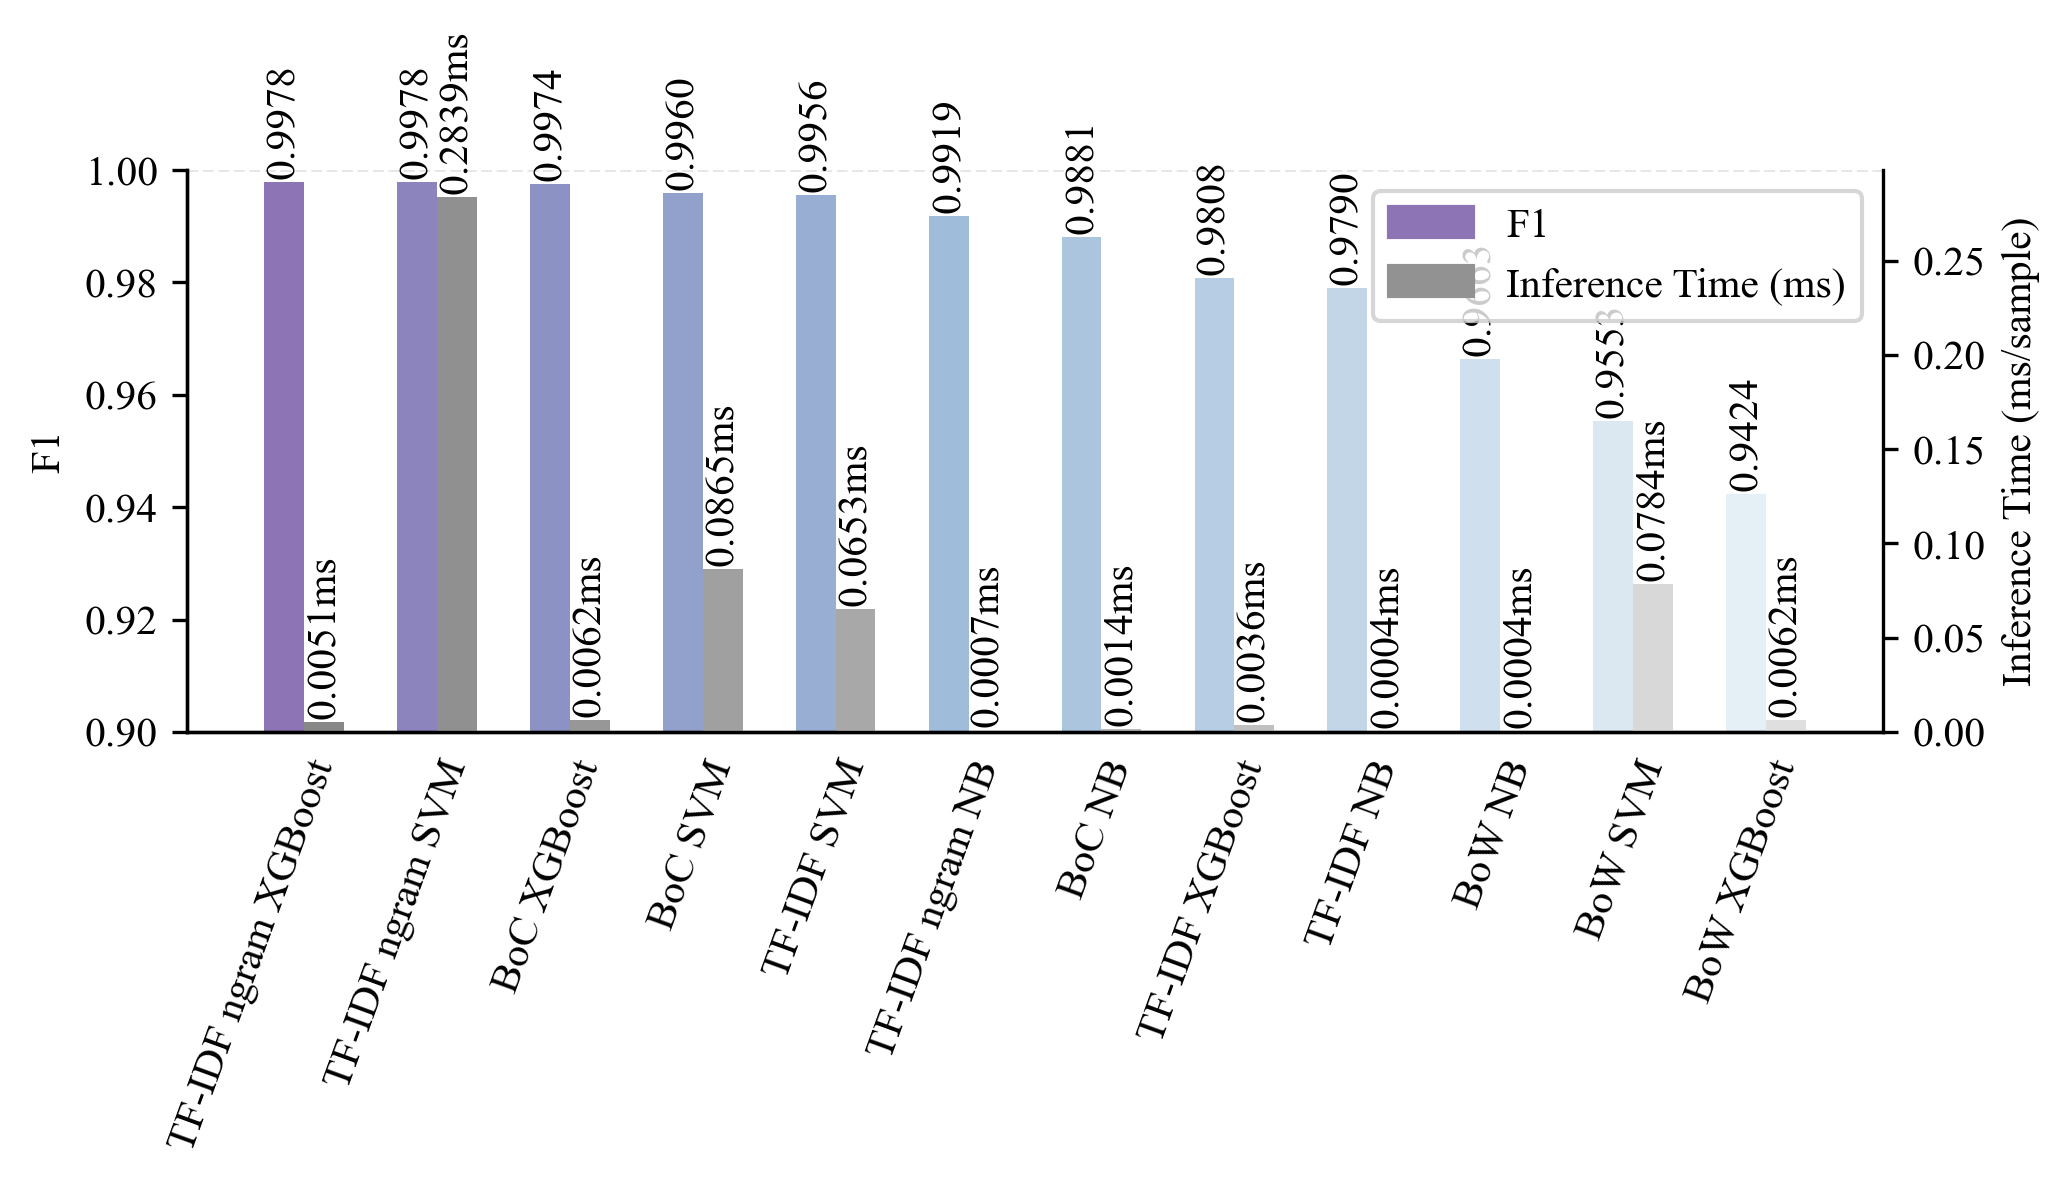

In [20]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(7,4))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])



_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### Table Hybrid NLP

In [21]:
# Table: Hybrid NLP
table_name = "hybrid"
caption="Accuracy and inference speed of hybrid NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'hybrid'
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time', 'color', 'category']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))


s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

if SAVE_OUTPUTS:
       s.to_latex(buf=out_file_name,
              column_format="lrrrrrr", position="htbp", position_float="centering",
              hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of hybrid NLP methods.}
\label{table:hybrid}
\begin{tabular}{lrrrrrr}
\toprule
{Method} & {Accuracy} & {Precision} & {Recall} & {F1} & {Training Time (ms)} & {Inference Time (ms)} \\
\midrule
Hybrid-1 NB & 99.1649 & 0.9993 & 0.9838 & 0.9915 & \textbf{0.0024} & \textbf{0.0033} \\
Hybrid-1 XGBoost & 99.7821 & 0.9963 & \textbf{0.9993} & 0.9978 & 1.2423 & 0.0171 \\
Hybrid-1 SVM & 99.7821 & 0.9971 & 0.9985 & 0.9978 & 0.5083 & 0.4972 \\
Hybrid-1 All & 99.7821 & 0.9971 & 0.9985 & 0.9978 & 1.7530 & 0.5176 \\
Hybrid-2 BoC & 99.6732 & 0.9971 & 0.9963 & 0.9967 & 0.4732 & 0.1087 \\
Hybrid-2 TF-IDF & 99.5643 & 0.9949 & 0.9963 & 0.9956 & 0.2105 & 0.0843 \\
Hybrid-2 TF-IDF ngram & \textbf{99.8184} & 0.9978 & 0.9985 & \textbf{0.9982} & 1.0017 & 0.3027 \\
Hybrid-3 & 99.6732 & \textbf{0.9993} & 0.9941 & 0.9967 & 0.3381 & 0.2800 \\
Hybrid-4 NB & 99.0922 & 0.9993 & 0.9824 & 0.9907 & 0.0152 & 0.0095 \\
Hybrid-4 XGBoost & 99.7821 & 0.9963 & 

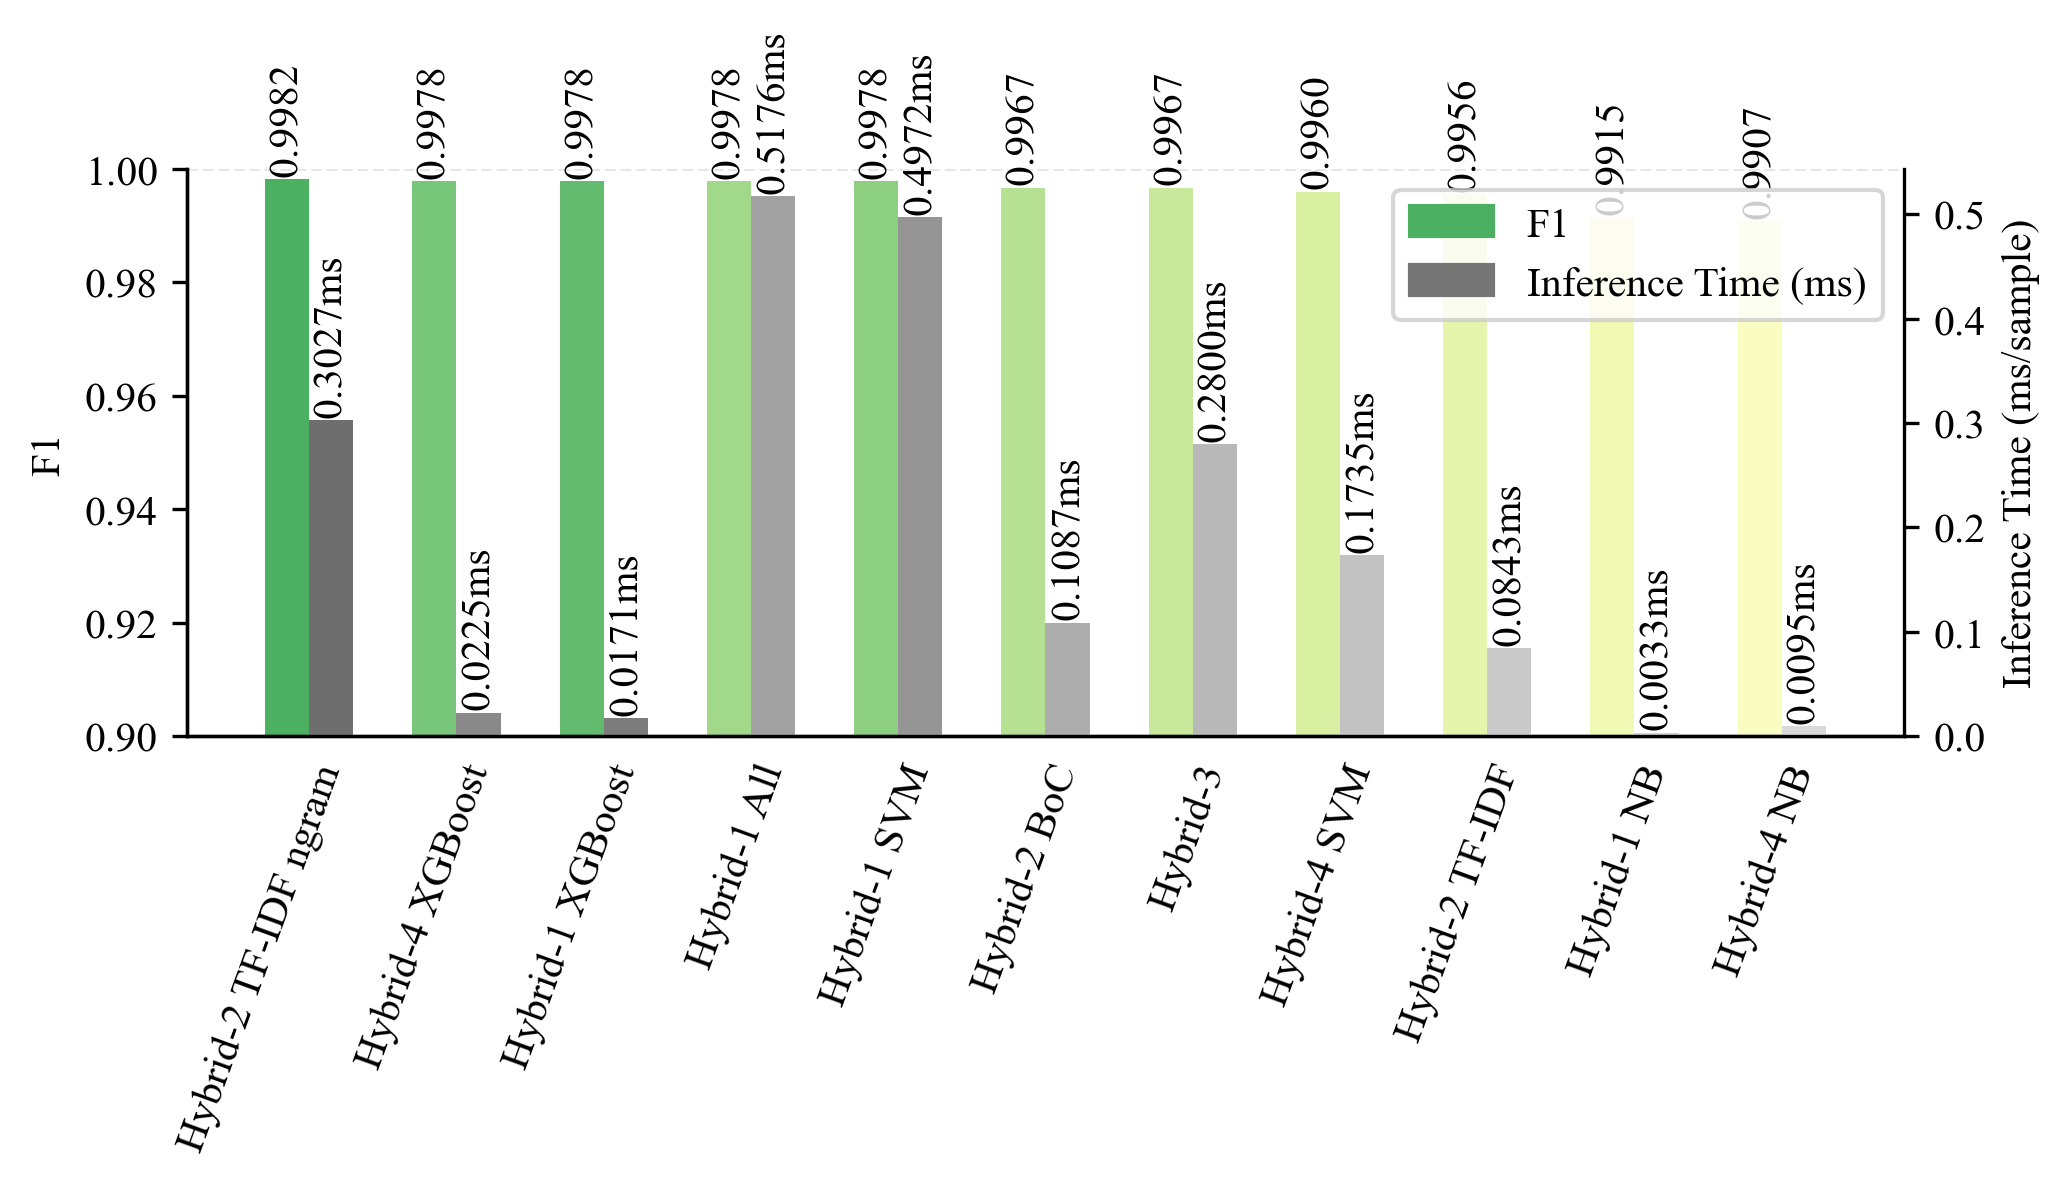

In [22]:
# Figure of Table Hybrid NLP
current_figure_name = 'hybrid_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(7,4))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='hybrid'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])



_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')

ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='upper right')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### Transformers

In [23]:
# Table: Transformer NLP
table_name = "transformer"
caption="Accuracy and inference speed of trasnformer NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
method_cat = 'transformer'
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time', 'color', 'category']

df_small = df.loc[df['category']==method_cat,metrics]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small.drop(['color', 'category'], axis=1 ))


s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

if SAVE_OUTPUTS:
       s.to_latex(buf=out_file_name,
              column_format="lrrrrrr", position="htbp", position_float="centering",
              hrules=True, label=f"tab:{table_name}", caption=caption)

print(s.to_latex(
    column_format="lrrrrrr", position="ht", position_float="centering",
    hrules=True, label=f"table:{table_name}", caption=caption)
)

\begin{table}[ht]
\centering
\caption{Accuracy and inference speed of trasnformer NLP methods.}
\label{table:transformer}
\begin{tabular}{lrrrrrr}
\toprule
{Method} & {Accuracy} & {Precision} & {Recall} & {F1} & {Training Time (ms)} & {Inference Time (ms)} \\
\midrule
BERT UL12H768A12 & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & 37.1559 & 2.0849 \\
BERT CL12H768A12 & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & 36.2127 & 2.0651 \\
BERT small UL2H128A2 & 0.9949 & 0.9941 & 0.9956 & 0.9949 & \textbf{13.3788} & \textbf{1.1251} \\
BERT small UL4H512A8 & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & 17.2692 & 1.3133 \\
BERT small UL8H128A2 & 0.9975 & 0.9978 & 0.9971 & 0.9974 & 20.8369 & 1.4030 \\
BERT small UL12H768A12 & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & 36.6347 & 2.0954 \\
BERT MCL12H768A12 & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & \textbf{1.0000} & 39.3569 &

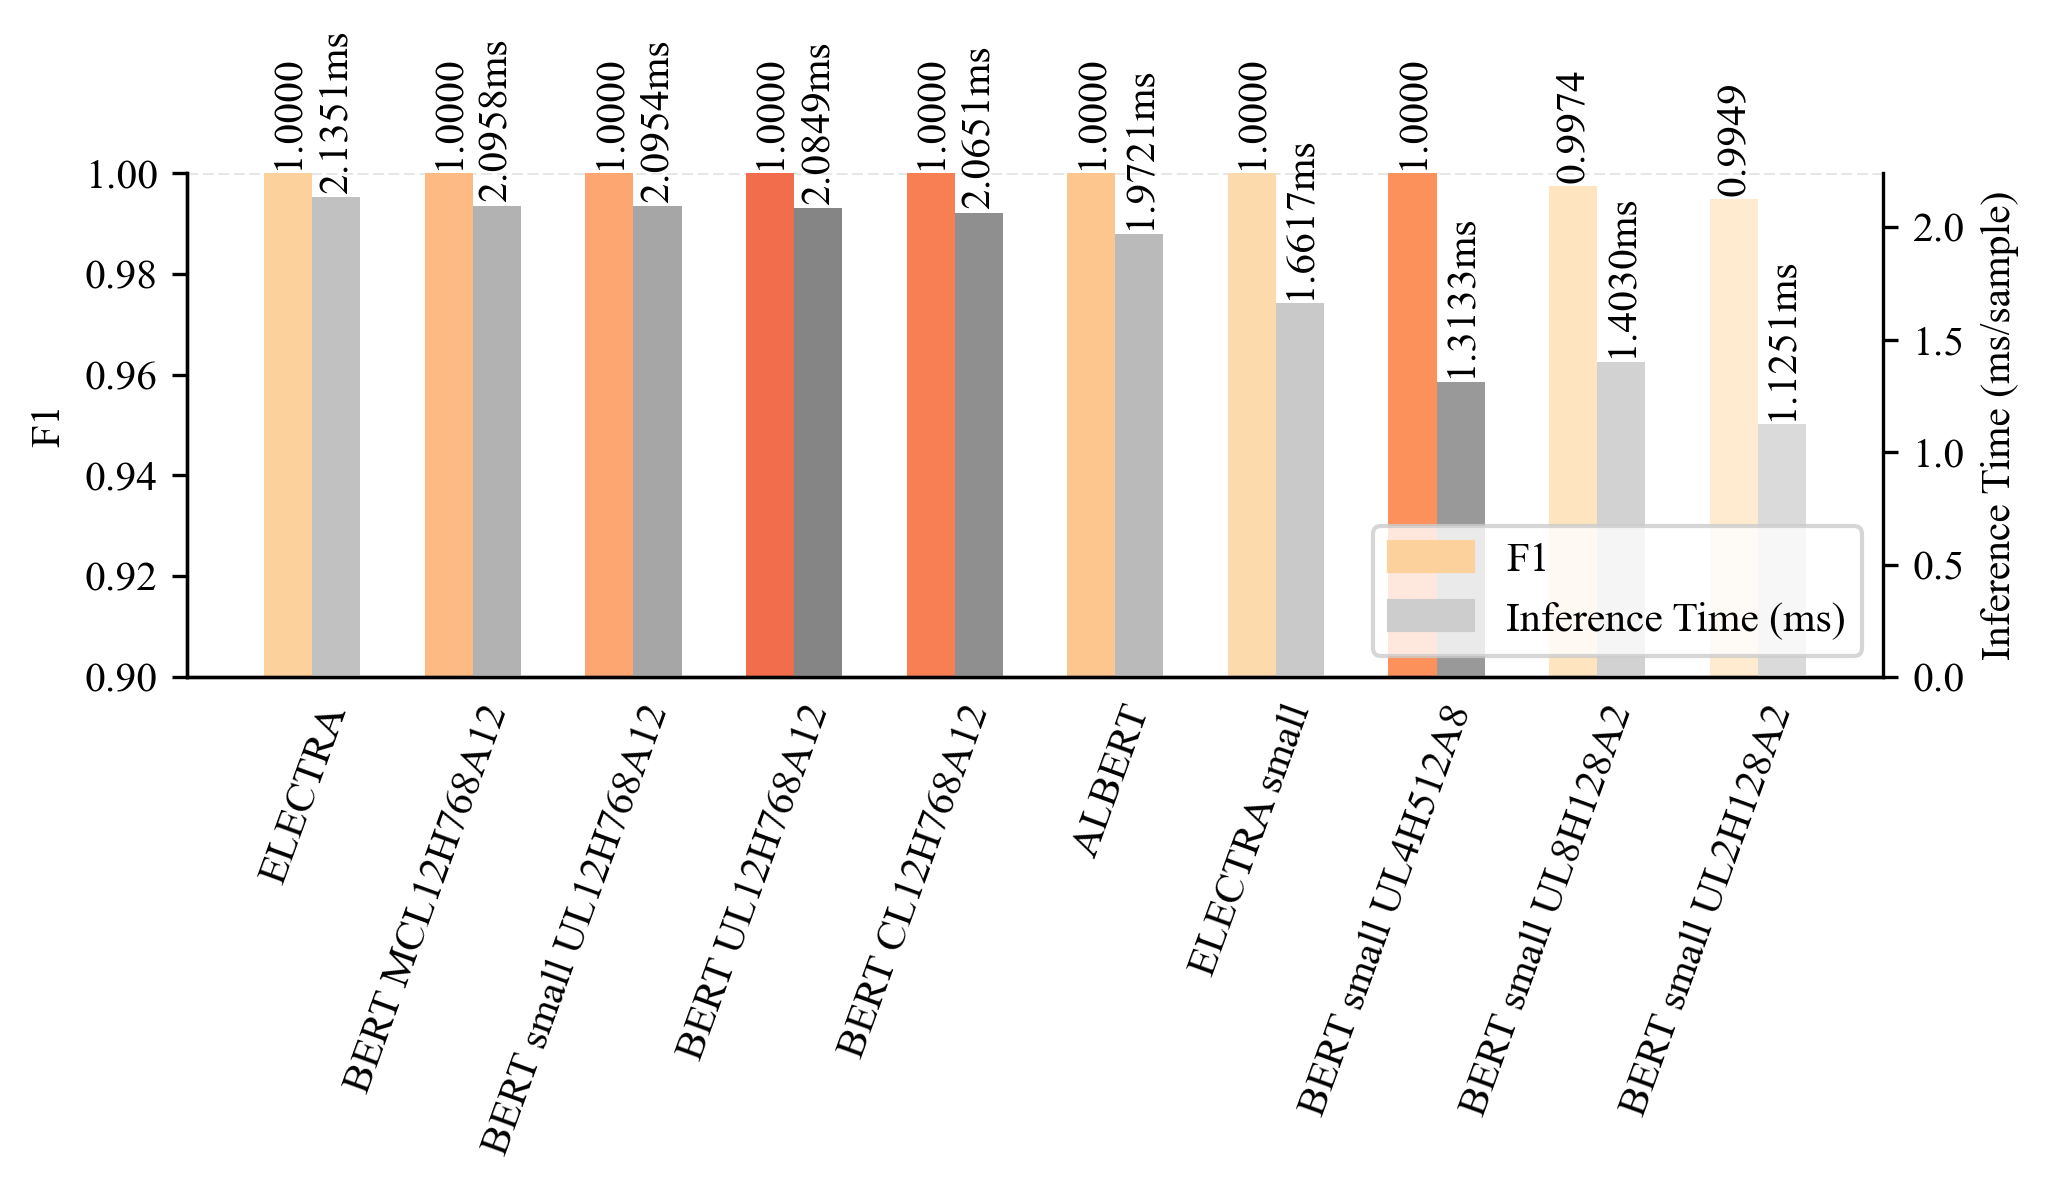

In [24]:
# Figure of Table Transformer NLP
current_figure_name = 'transformer_nlp_f1_vs_time.png'
fig, ax = plt.subplots( figsize=(7,4))

metric = ['F1', 'Inference Time (ms)']
df_small = df_small.sort_values(metric,ascending=False)

# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='transformer'] 
                         .head(1)['color'].values[0][0], dtype=np.float32)
color_cat_1G = color_cat_1.copy()
color_cat_1G[0:3] = color_cat_1G[0:3].mean()

legend_cat_1 = mpatches.Patch(color=color_cat_1, label=metric[0])
legend_cat_1G = mpatches.Patch(color=color_cat_1G, label=metric[1])



_, ax2 = my_plot_twin_bar(df_small,ax,metric)
ax.axhline(1,  linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set(ylim=(0.90, 1))
ax.set_ylabel('F1')


ax2.set_ylabel('Inference Time (ms/sample)')
# #ax.set(ylim=(0.95, 1))
ax2.legend(handles=[legend_cat_1, legend_cat_1G],  loc='lower right')
fig.tight_layout()
if SAVE_OUTPUTS:
    ax2.get_figure().savefig(figure_folder / current_figure_name)


### All methods FE score vs alpha

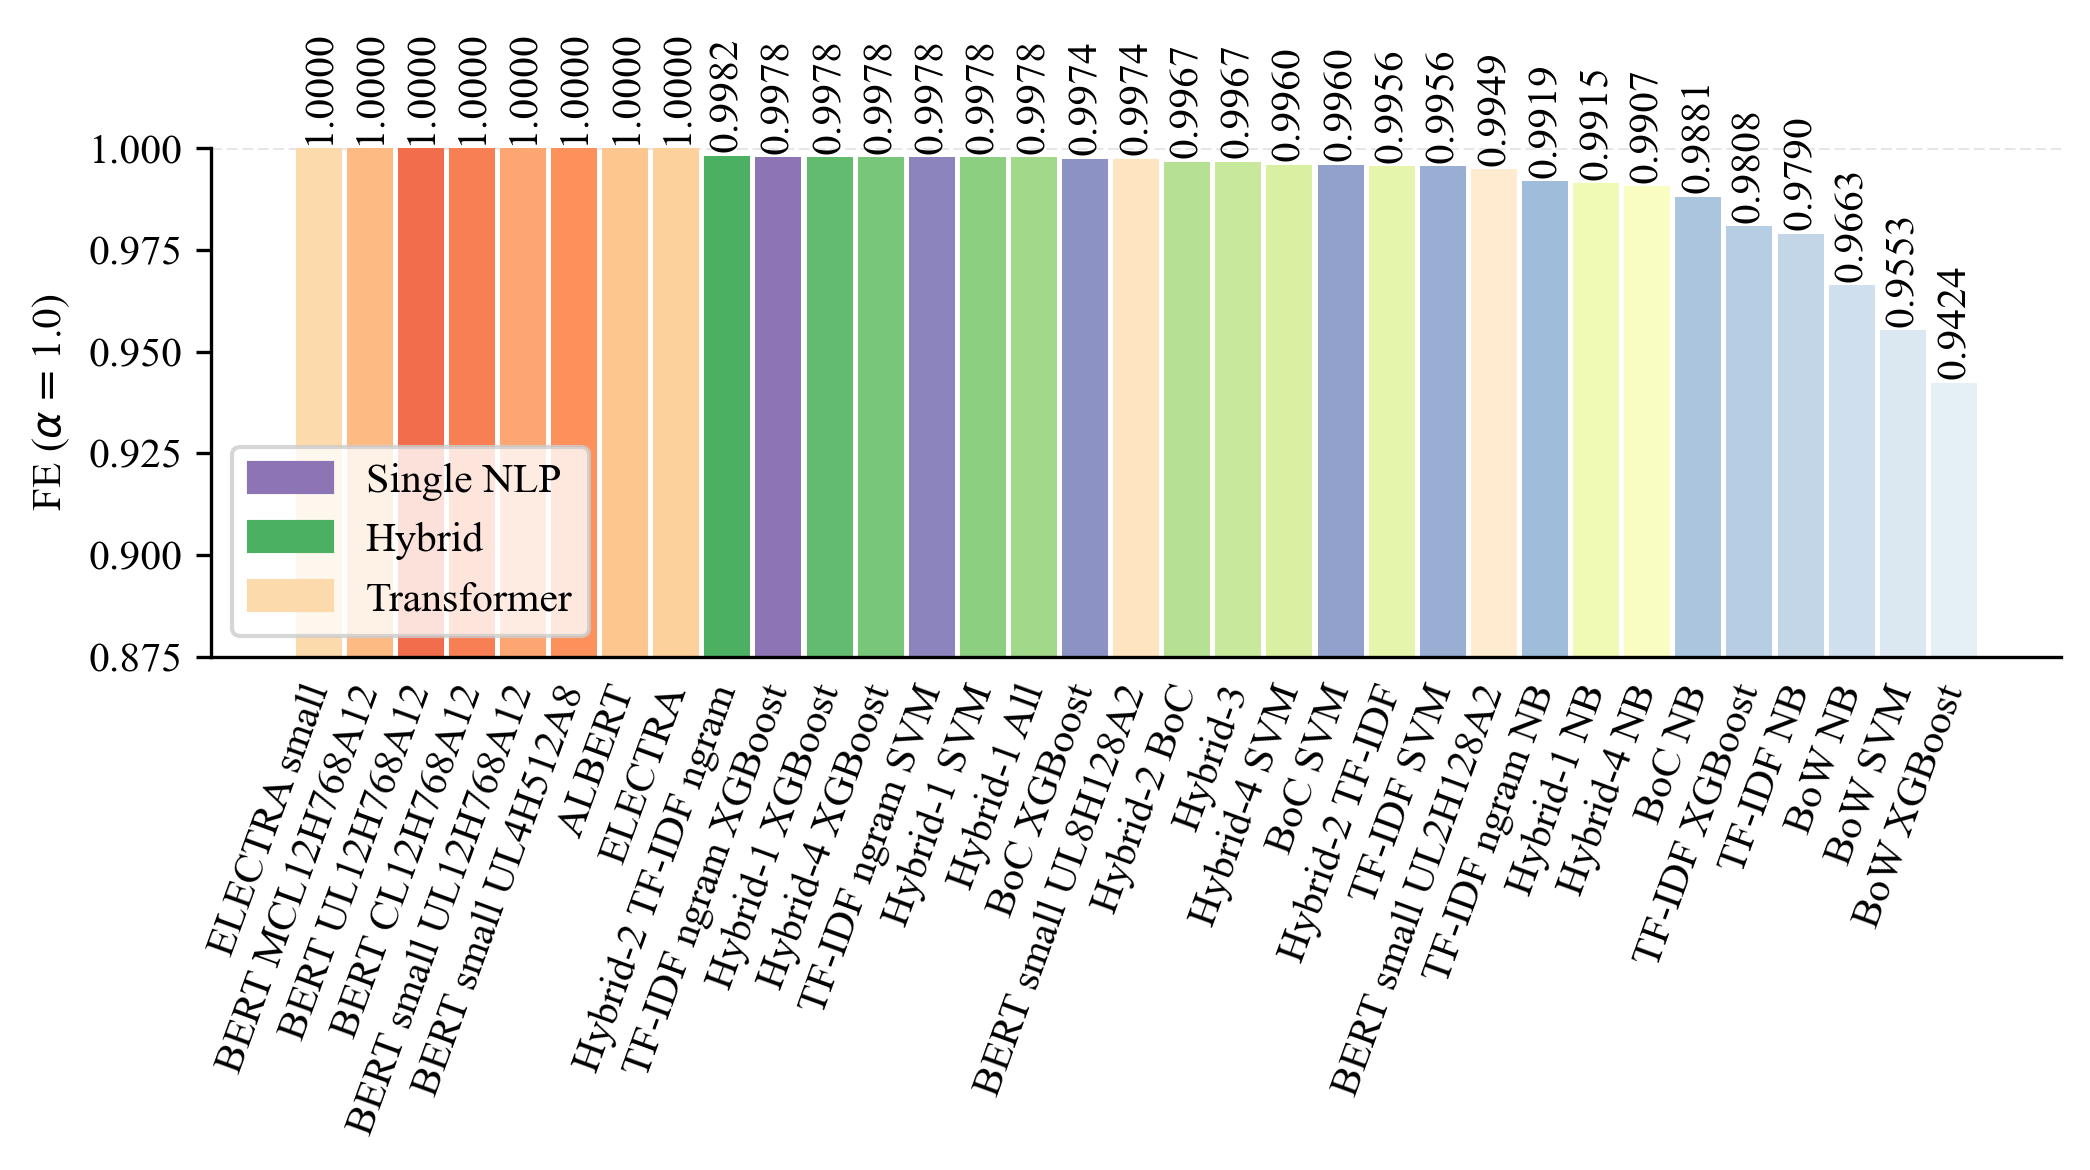

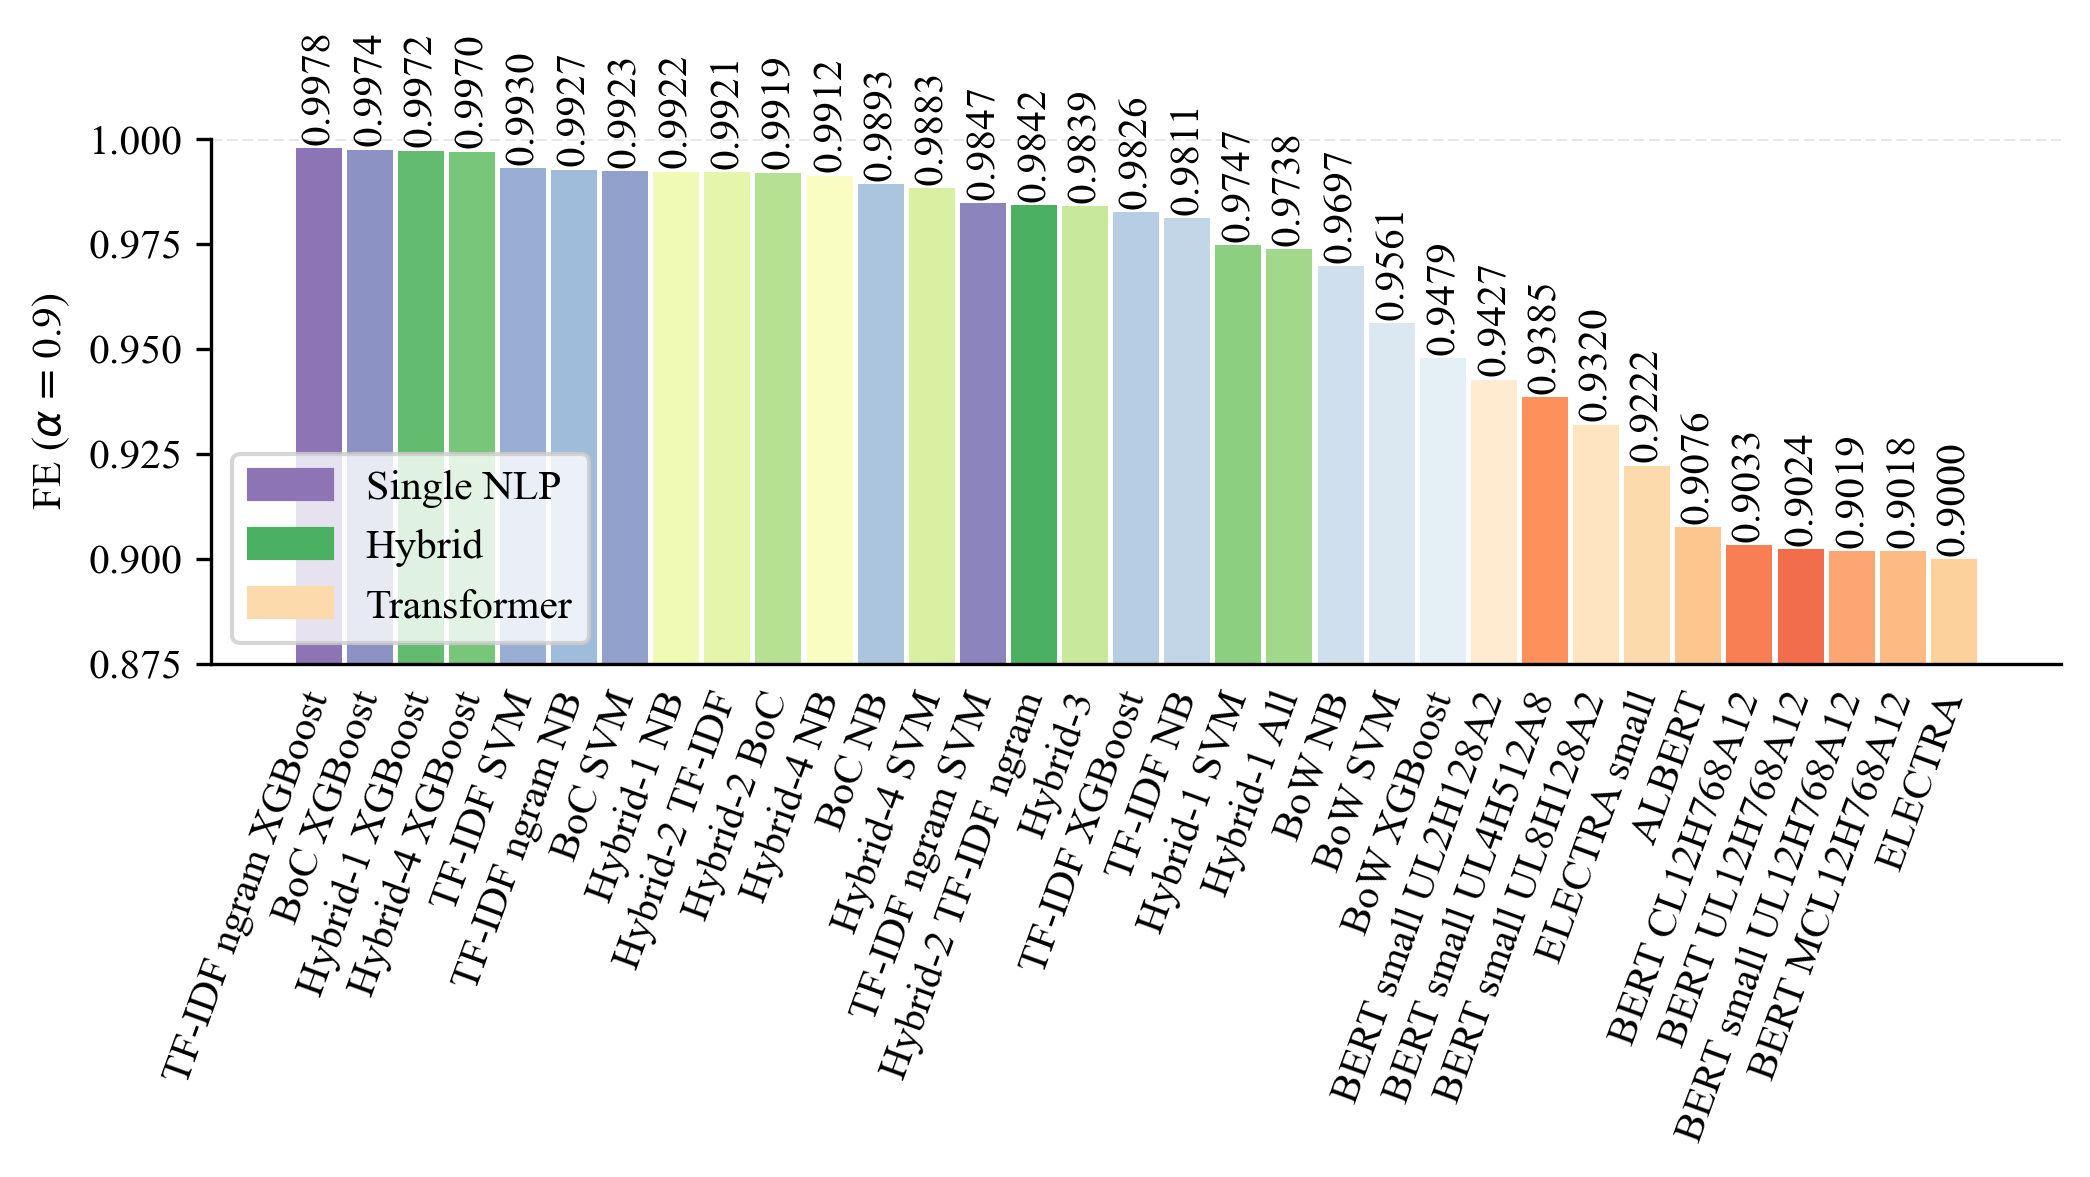

In [25]:
#ALL FE comparison for different alpha
from sklearn import preprocessing

current_figure_name = 'all_nlp_FE_alpha_100.png'

#df_small = df.sort_values(['category','f1'],ascending=[True, False])
df_small = df.sort_values('f1',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['testing time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

alpha = 1.0
#alpha=1.00 #emphasis on F1 rather than speed
df_small['FE_100'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
alpha = 0.9
df_small['FE_090'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']

df_small = rename_table_labels(df_small)



# legend
color_cat_1 = np.asarray(df_small[df_small['category']=='classic_ml'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_2 = np.asarray(df_small[df_small['category']=='hybrid'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
color_cat_3 = np.asarray(df_small[df_small['category']=='transformer'] 
                         .head(1)['color'].values[0][0], dtype=np.float32) 
legend_cat_1 = mpatches.Patch(color=color_cat_1, label='Single NLP')
legend_cat_2 = mpatches.Patch(color=color_cat_2, label='Hybrid')
legend_cat_3 = mpatches.Patch(color=color_cat_3, label='Transformer')

# Figure
fig, ax = plt.subplots(figsize=(7, 4))
df_small = df_small.sort_values('FE_100',ascending=False)

my_plot_bar(df_small,ax,'FE_100')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)

ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{1.0})')
#ax.set_xlabel(r'$\alpha=$' + f'{alpha}')
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

#########################
current_figure_name = 'all_nlp_FE_alpha_090.png'
fig, ax = plt.subplots(figsize=(7, 4))
df_small = df_small.sort_values('FE_090',ascending=False)
my_plot_bar(df_small,ax,'FE_090')
plt.axhline(1, linestyle='--', linewidth=0.7, color=[0.9,0.9,0.9], zorder=0)
ax.set_ylabel('FE'+ r' ($\alpha=$' + f'{0.9})')
#ax.set_xlabel()
ax.set(ylim=(0.875, 1))
ax.legend(handles=[legend_cat_1, legend_cat_2, legend_cat_3],  loc='lower left')

fig.tight_layout()
if SAVE_OUTPUTS:
    ax.get_figure().savefig(figure_folder / current_figure_name)

# TODO
- 

# End